In [1]:
import rps.robotarium as robotarium
from rps.utilities.transformations import *
from rps.utilities.barrier_certificates import *
from rps.utilities.misc import *
from rps.utilities.controllers import *

import numpy as np
import time


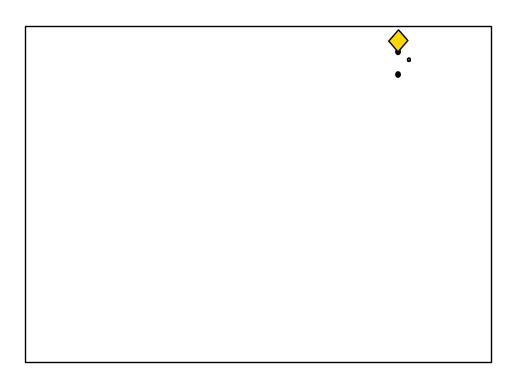

<Figure size 640x480 with 0 Axes>

In [2]:
X_plot = [] #Position log for plotting

# Instantiate Robotarium object
N = 1 #One robot
init_conditions = np.array(np.mat('1; 0.8; 0')) #Initial robot pose

r = robotarium.Robotarium(number_of_robots=N, show_figure=True, initial_conditions=init_conditions, sim_in_real_time=False) #Launch the Robotarium

# Task: what does this function do?
goal_points = generate_initial_conditions(N)

# For this example we will use a stock controller given by the robotarium: in the project you will create your own controller
single_integrator_position_controller = create_si_position_controller()
"""Qui sostituiremo il nostro controllore"""
# Create barrier certificates to avoid collision
si_barrier_cert = create_single_integrator_barrier_certificate_with_boundary()

# Task: what do these lines do?
"""SI sta per single integrator. Dobbiamo fare una tasformazione delle coordinate perché .......
"""
_, uni_to_si_states = create_si_to_uni_mapping()
si_to_uni_dyn = create_si_to_uni_dynamics_with_backwards_motion()

# Initial poses
x = r.get_poses() #Unicycle state
x_si = uni_to_si_states(x) #x-y position
r.step()
X_plot.append(x_si)

In [5]:
# This is a general stopping condition: we check how many agents are 'close enough' to the goal and, if they all are, we can stop the simulation
while (np.size(at_pose(np.vstack((x_si,x[2,:])), goal_points, rotation_error=100)) != N):
    #Explaining the code above: the unicycle state takes the center of rotation of the robot as [0,0] while the state we use (so called single integrator state) uses the 'nose' of the robot. Hence these two are offset and we need to convert back and forth (this can also be noted when we will plot the robot's trajectory the 'true' starting point is slightly offset from the one we gave to the simulator).
    """La codizione dice di continuare finché un robot non è sufficientemente vicino al goal. Per ora prendiamola as-is"""
    #Main simulation loop
    # Get poses of agents
    x = r.get_poses() #Recupero lo stato dei robot che in questo caso è quello ver
    x_si = uni_to_si_states(x) #Qui lo stato è trasformato nell'integratore singolo

    # Create single-integrator control inputs
    # In the project you will create your own controller. 
    # Task: How do you think this can be done?
    dxi = single_integrator_position_controller(x_si, goal_points[:2][:]) 
    #dopodiché diamo l'ingresso di controllo. In questo momento non ci siamo creati nulla stiamo usando il controllore del robotarium.
    #lo faremo definendo una nuova funzione che racchiude il cotnrollore. Dato lo stato nel sistema dell'integratore e goal points che sono gli obiettivi
    # noi....

    

    # Create safe control inputs (i.e., no collisions)
    dxi = si_barrier_cert(dxi, x_si)#non lo considereremo 

    # Task: what does this function do?
    dxu = si_to_uni_dyn(dxi, x) #calcola l'ingresso di controllo. Dato lo stato ci restituisce il prossimo stato????

    # Set the velocities by mapping the single-integrator inputs to unciycle inputs
    r.set_velocities(np.arange(N), dxu) #impostiamo le velocità
    # Iterate the simulation
    r.step()

    X_plot.append(x_si)#ci salviamo la storia per plottare successivamente

#Call at end of script to print debug information and for your script to run on the Robotarium server properly
r.call_at_scripts_end()

##### DEBUG OUTPUT #####
Your simulation will take approximately 10 real seconds when deployed on the Robotarium. 

	 Simulation had 10 iteration(s) where the actuator limits were exceeded.


Text(0, 0.5, 'Y [m]')

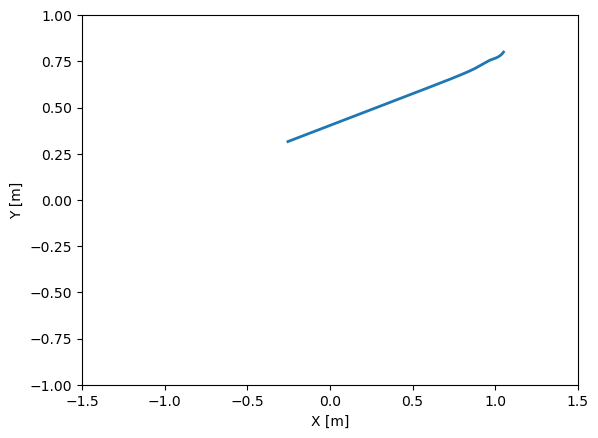

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

X_plot = np.array(X_plot)
#Task: create of plot of the trajector
plt.plot(X_plot[:,0],X_plot[:,1], linewidth=2)
"""Stiamo plottando la prima e la seconda dimensione di X_plot ovvero della posa perché non ci interessa l'angolo"""
#Drawing options
plt.ylim(-1,1)
plt.xlim(-1.5,1.5)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')